### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [155]:
data = pd.read_csv('data/coupons.csv')

In [156]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [158]:
# fill Nan with some description, eg. missing data to make it clear and also to keep the no of the rows intact, dropna wihtout axis is not
# used since it is impacting total no of rows in the input dataframe, fillna or replace statements below are same
# data.fillna(value="missing", inplace=True)
#data.replace(np.nan, "missing", inplace=True)
# axix=1 removes columns where NaN's are there
data = data.dropna(axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   destination        12684 non-null  object
 1   passanger          12684 non-null  object
 2   weather            12684 non-null  object
 3   temperature        12684 non-null  int64 
 4   time               12684 non-null  object
 5   coupon             12684 non-null  object
 6   expiration         12684 non-null  object
 7   gender             12684 non-null  object
 8   age                12684 non-null  object
 9   maritalStatus      12684 non-null  object
 10  has_children       12684 non-null  int64 
 11  education          12684 non-null  object
 12  occupation         12684 non-null  object
 13  income             12684 non-null  object
 14  toCoupon_GEQ5min   12684 non-null  int64 
 15  toCoupon_GEQ15min  12684 non-null  int64 
 16  toCoupon_GEQ25min  12684 non-null  int64

4. What proportion of the total observations chose to accept the coupon? 

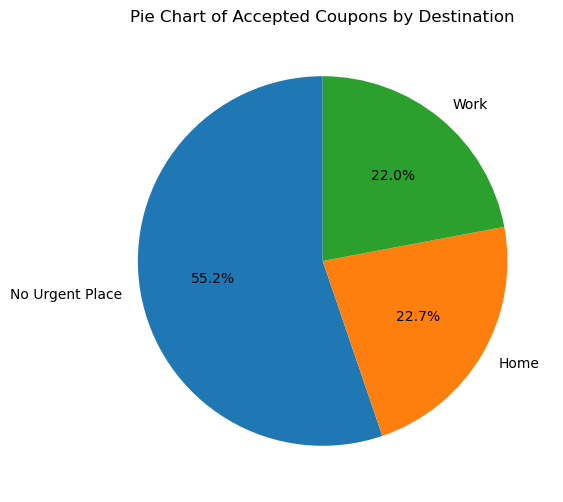

In [159]:
# filter the data based on Y == 1
filetered_df = data.query("Y == 1")
filtered_df_counts = filetered_df["destination"].value_counts()

# plot a pie chart to view the port of coupons used by destination
plt.figure(figsize=(8, 6))
plt.pie(filtered_df_counts, labels=filtered_df_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Accepted Coupons by Destination')
plt.show()

5. Use a bar plot to visualize the `coupon` column.

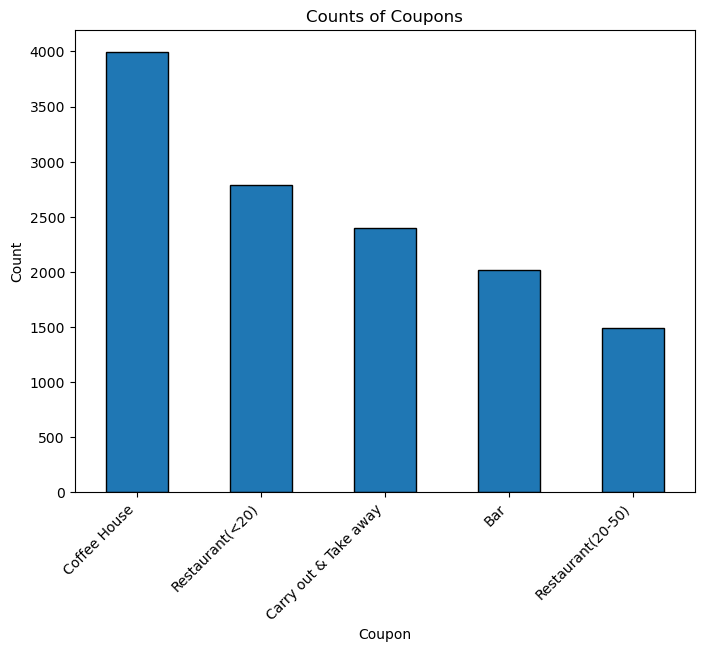

In [160]:
# Count the occurrences of each coupon
coupon_counts = data['coupon'].value_counts()

# Plotting a bar plot
plt.figure(figsize=(8, 6))
coupon_counts.plot(kind='bar', edgecolor='black')
plt.title('Counts of Coupons')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align them to the right
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.show()

6. Use a histogram to visualize the temperature column.

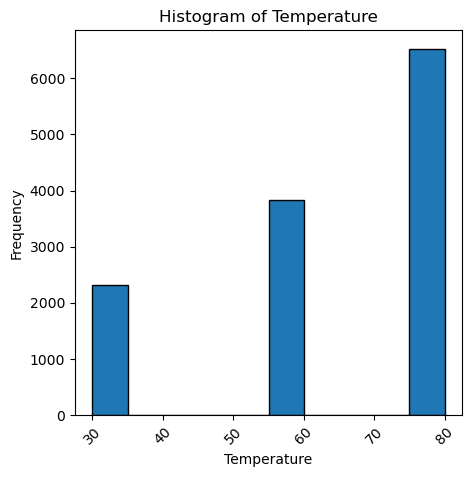

In [161]:
plt.figure(figsize=(5, 5))
plt.hist(data['temperature'], bins=10, edgecolor='black')  
plt.title('Histogram of Temperature')
plt.xticks(rotation=45)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

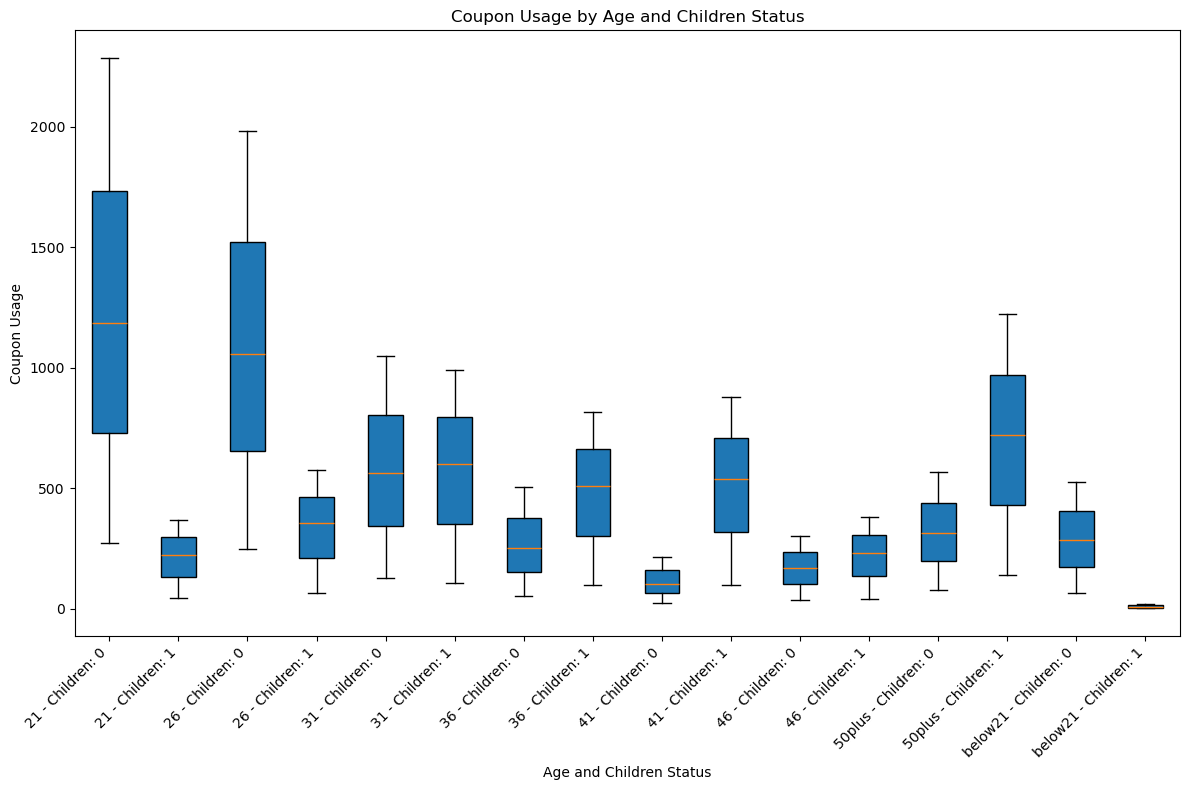

In [162]:
# Use a box plot to visualize coupons usage by age and has_childern columns
data = pd.read_csv('data/coupons.csv')
# Grouping by age and has_children, and calculating coupon usage
grouped_data = data.groupby(["age", "has_children"])[['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']].sum()

# Creating a list of labels for x-axis
# Create lists to hold the data for each group
data_to_plot = []
labels = []

# Loop through each unique age and has_children combination
for age, has_children in grouped_data.index:
    # Collect coupon usage values for the current age and has_children group
    data = grouped_data.loc[(age, has_children)].values
    data_to_plot.append(data)
    
    # Create a label for the current age and has_children group
    label = f'{age} - Children: {has_children}'
    labels.append(label)

# Create a boxplot
plt.figure(figsize=(12, 8))  # Adjust figure size if necessary
plt.boxplot(data_to_plot, labels=labels, patch_artist=True)

# Adding labels and title
plt.title('Coupon Usage by Age and Children Status')
plt.xlabel('Age and Children Status')
plt.ylabel('Coupon Usage')

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

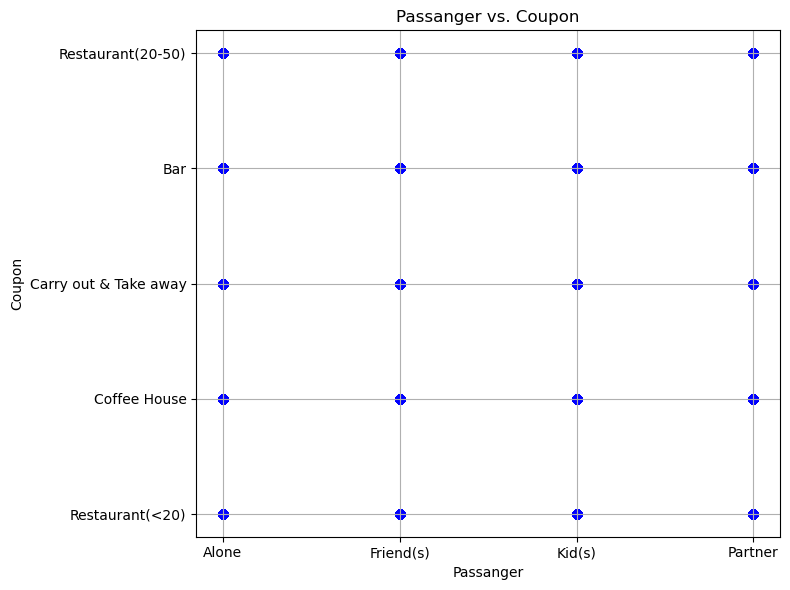

In [163]:
# Plotting a basic scatter plot
data = pd.read_csv('data/coupons.csv')
plt.figure(figsize=(8, 6))
plt.scatter(data['passanger'], data['coupon'], color='blue', marker='o')

# Adding labels and title
plt.title('Passanger vs. Coupon')
plt.xlabel('Passanger')
plt.ylabel('Coupon')

# Show plot
plt.grid(True)  # Optional: add grid
plt.tight_layout()
plt.show()

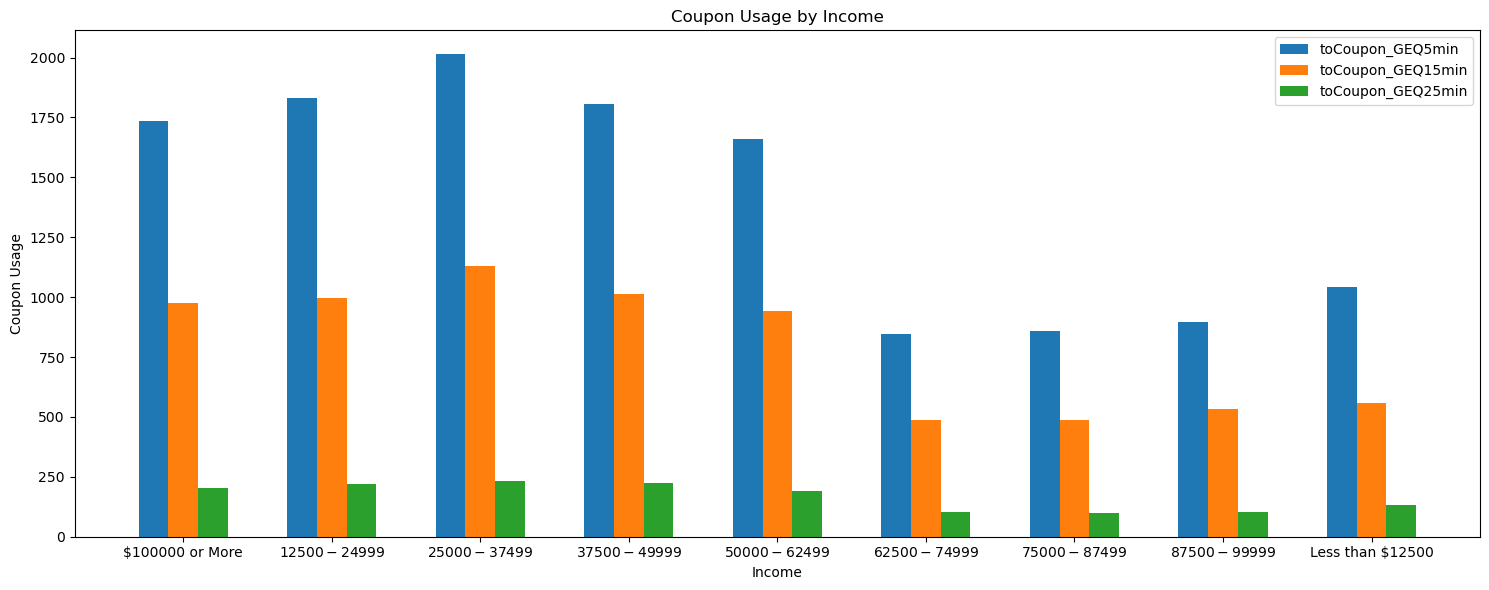

In [164]:
# Use a bar plot to visualiza the data based on income and coupons used
data = pd.read_csv('data/coupons.csv')
coupon_usage = data.groupby('income')[['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']].sum()

# Plotting parameters
plt.figure(figsize=(15, 6))

# Getting the number of income levels for positioning bars
num_incomes = len(coupon_usage.index)
bar_width = 0.2  # Width of each bar
index = range(num_incomes)

# Plotting bars for each coupon
plt.bar(index, coupon_usage['toCoupon_GEQ5min'], width=bar_width, label='toCoupon_GEQ5min')
plt.bar([i + bar_width for i in index], coupon_usage['toCoupon_GEQ15min'], width=bar_width, label='toCoupon_GEQ15min')
plt.bar([i + 2 * bar_width for i in index], coupon_usage['toCoupon_GEQ25min'], width=bar_width, label='toCoupon_GEQ25min')

# Adding labels and title
plt.xlabel('Income')
plt.ylabel('Coupon Usage')
plt.title('Coupon Usage by Income')
plt.xticks([i + bar_width for i in index], coupon_usage.index)  
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [165]:
# load the coupons.csv
df = pd.read_csv('data/coupons.csv')
#df.info()

# Filte df to create a new DataFrame with only 'Bar' coupons
bar_coupons_df = df[df['coupon'] == 'Bar']
bar_coupons_df.transpose() 

,9,13,17,24,35,39,46,57,61,75,...,12643,12644,12647,12652,12660,12663,12664,12667,12670,12682
destination,No Urgent Place,Home,Work,No Urgent Place,Home,Work,No Urgent Place,Home,Work,No Urgent Place,...,No Urgent Place,No Urgent Place,No Urgent Place,Home,Work,No Urgent Place,No Urgent Place,No Urgent Place,No Urgent Place,Work
passanger,Kid(s),Alone,Alone,Friend(s),Alone,Alone,Friend(s),Alone,Alone,Kid(s),...,Friend(s),Friend(s),Alone,Partner,Alone,Friend(s),Friend(s),Alone,Partner,Alone
weather,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,...,Sunny,Sunny,Rainy,Sunny,Snowy,Sunny,Sunny,Rainy,Rainy,Snowy
temperature,80,55,55,80,55,55,80,55,55,80,...,80,55,55,30,30,80,55,55,55,30
time,10AM,6PM,7AM,10AM,6PM,7AM,10AM,6PM,7AM,10AM,...,10PM,10PM,10AM,10PM,7AM,10PM,10PM,10AM,6PM,7AM
coupon,Bar,Bar,Bar,Bar,Bar,Bar,Bar,Bar,Bar,Bar,...,Bar,Bar,Bar,Bar,Bar,Bar,Bar,Bar,Bar,Bar
expiration,1d,1d,1d,1d,1d,1d,1d,1d,1d,1d,...,1d,2h,1d,2h,1d,1d,2h,1d,2h,1d
gender,Female,Female,Female,Male,Male,Male,Male,Male,Male,Male,...,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
age,21,21,21,21,21,21,46,46,46,46,...,31,31,31,31,31,26,26,26,26,26
maritalStatus,Unmarried partner,Unmarried partner,Unmarried partner,Single,Single,Single,Single,Single,Single,Married partner,...,Married partner,Married partner,Married partner,Married partner,Married partner,Single,Single,Single,Single,Single


2. What proportion of bar coupons were accepted?


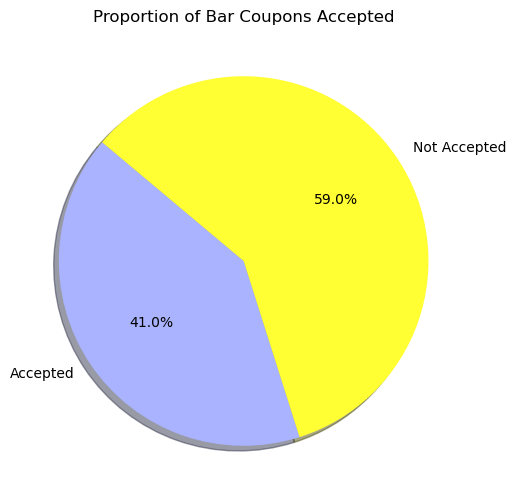

In [166]:
# Calculate the portion of 'Bar' coupons that were accepted (Y = 1)
accepted_portion = bar_coupons_df['Y'].mean()

# Calculate the portion of not accepted 'Bar' coupons (Y = 0)
not_accepted_portion = 1 - accepted_portion

# Plotting a pie chart
labels = ['Accepted', 'Not Accepted']
sizes = [accepted_portion, not_accepted_portion]
colors = ['#aab3ff', '#ffff34']  # purple for accepted, yellow for not accepted

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Bar Coupons Accepted')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


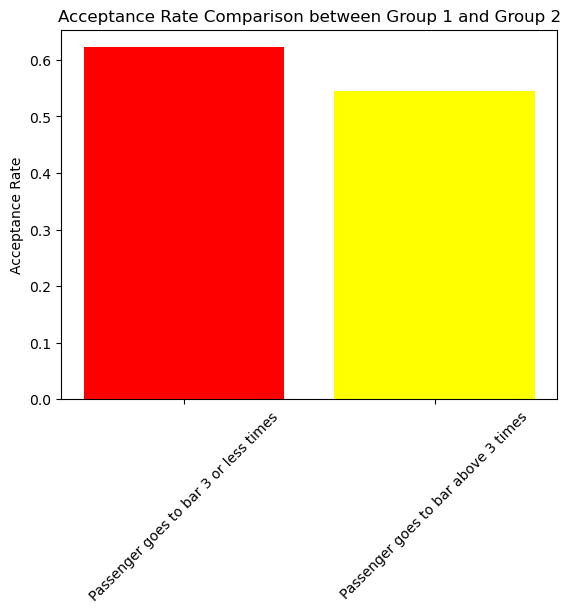

In [167]:
df = pd.read_csv('data/coupons.csv')
# unique values of the Bar column =array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

# Define values to compare against
bar_values_3_or_less = ['less1', '1~3']

# filter the drivers who go to bar 3 or a fewer times
bar_frequency_3_or_less = df[(df['Bar'].isin(compare_values))]

# filter the drivers who goes more than 3 times to a Bar
bar_frequency_other = df[~(df['Bar'].isin(compare_values))]

# Calculate acceptance rates for both groups
acceptance_rate_grp_1 = bar_frequency_3_or_less['Y'].mean()
acceptance_rate_grp_2 = bar_frequency_other['Y'].mean()

# Plotting
labels = ['Passenger goes to bar 3 or less times', 'Passenger goes to bar above 3 times']
acceptance_rates_grp1_grp2 = [acceptance_rate_grp_1, acceptance_rate_grp_2]

plt.bar(labels, acceptance_rates_grp1_grp2, color=['red', 'yellow'])
plt.xticks(rotation = 45)
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate Comparison between Group 1 and Group 2')
# plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 (assuming acceptance rate is between 0 and 1)
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


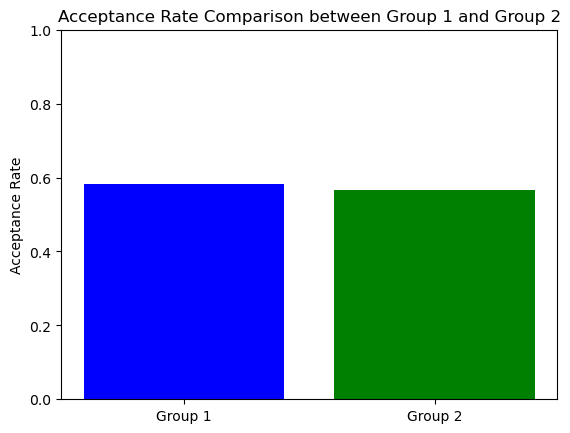

In [168]:
# unique values of bar column
#df['Bar'].unique() # ['never', 'less1', '1~3', 'gt8', NaN, '4~8']

# Convert 'Age' column to numeric type (int or float), otherwise thrown TypeError: '>' not supported between instances of 'str' and 'int'
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # coerce to handle non-numeric strings

# Define values to compare against
compare_values = ['1~3', '4~8', 'gt8']

passenger_values = df['passanger'].unique()
#array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

# Filter drivers(passanger column with Alone value is treated as Driver) who go to a bar more than once a month and are over age 25
group_1 = df[(df['Bar'].isin(compare_values)) & (df['age'] > 25) & (df['passanger'] == "Alone")]

# # Filter all other drivers
group_2 = df[~((df['Bar'].isin(compare_values)) & (df['age'] > 25) & (df['passanger'] == "Alone"))]

# Calculate acceptance rates for both groups
acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()

#Plotting
labels = ['Group 1', 'Group 2']
acceptance_rates = [acceptance_rate_group_1, acceptance_rate_group_2]

plt.bar(labels, acceptance_rates, color=['blue', 'green'])
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate Comparison between Group 1 and Group 2')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 (assuming acceptance rate is between 0 and 1)
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


Average Acceptance Rate for drivers meeting criteria: 0.6231060606060606


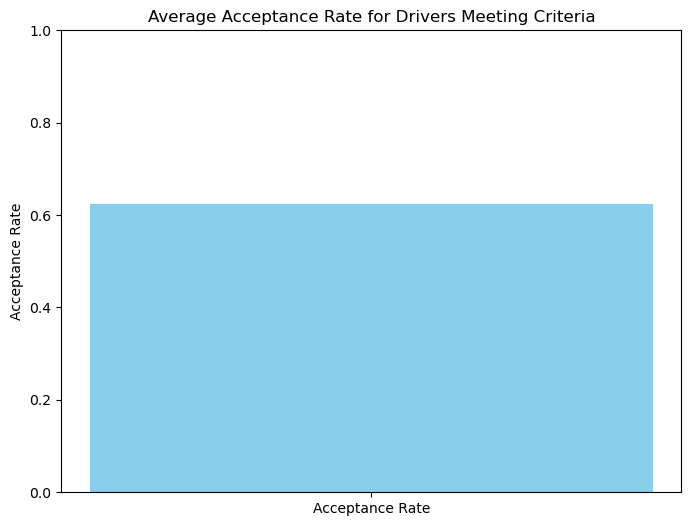

In [169]:
# Define bar values to compare against
bar_compare_values = ['1~3', '4~8', 'gt8']
#df['Bar'].unique() # ['never', 'less1', '1~3', 'gt8', NaN, '4~8']

# Define passenger values to compare against
passenger_compare_values = ['Alone', 'Friend(s)', 'Partner']
#array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

# Convert 'Age' column to numeric type (int or float), otherwise thrown TypeError: '>' not supported between instances of 'str' and 'int'
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # coerce to handle non-numeric strings

# Filter the DataFrame
filtered_df = df[(df['Bar'].isin(bar_compare_values)) & 
                 (df['passanger'].isin(passenger_compare_values)) & 
                 (~df['occupation'].isin(["Farming Fishing & Forestry"]))]

# Calculate the average acceptance rate
average_acceptance_rate = filtered_df['Y'].mean()

print("Average Acceptance Rate for drivers meeting criteria:", average_acceptance_rate)

# Plotting the average acceptance rate
plt.figure(figsize=(8, 6))
plt.bar(['Acceptance Rate'], [average_acceptance_rate], color='skyblue')
plt.title('Average Acceptance Rate for Drivers Meeting Criteria')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Limit y-axis to range [0, 1] for acceptance rate
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

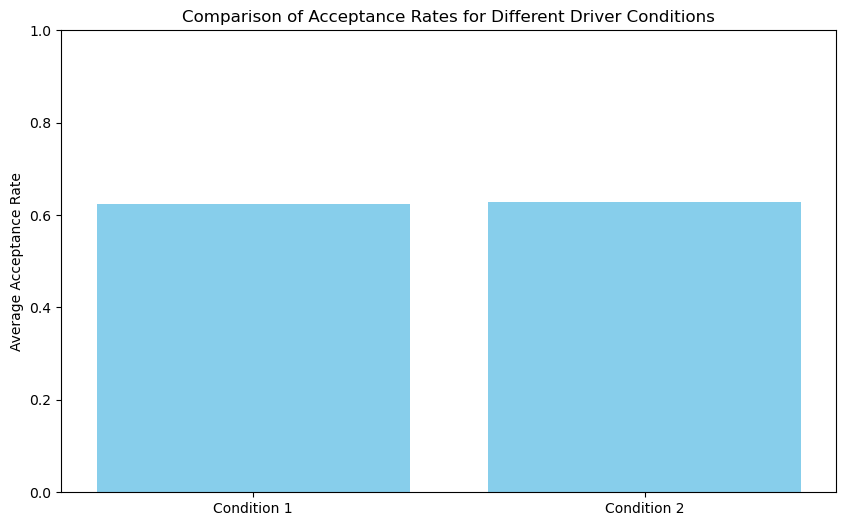

In [170]:
df = pd.read_csv('data/coupons.csv')
bar_compare_values = ['1~3', '4~8', 'gt8']
#df['Bar'].unique() # ['never', 'less1', '1~3', 'gt8', NaN, '4~8']

# Define passenger values to compare against
passenger_compare_values = ['Alone', 'Friend(s)', 'Partner']
#array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

# Convert 'Age' column to numeric type (int or float), otherwise thrown TypeError: '>' not supported between instances of 'str' and 'int'
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # coerce to handle non-numeric strings

# Filter 1: Drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed
condition1 = (df['Bar'].isin(bar_compare_values)) & (df['passanger'].isin(passenger_compare_values)) & (df['maritalStatus'] != 'Widowed')

# Filter 2: Drivers who go to bars more than once a month and are under the age of 30
condition2 = (df['Bar'].isin(bar_compare_values)) & (df['age'] < 30)

# Convert 'income' column to numeric type (int or float), otherwise thrown TypeError: '>' not supported between instances of 'str' and 'int'
df['income'] = pd.to_numeric(df['income'], errors='coerce')  # coerce to handle non-numeric strings

# Filter 3: Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
# RestaurantLessThan20 column values ['4~8', '1~3', 'less1', 'gt8', nan, 'never'
cheapRestaurant_compare_value = ['4~8', 'gt8']
condition3 = (df['RestaurantLessThan20'].isin(cheapRestaurant_compare_value)) & (df['income'] < 50000)

# Apply filters and calculate average acceptance rates
filtered_df1 = df[condition1]
filtered_df2 = df[condition2]
filtered_df3 = df[condition3] # condition3 does not have matching records, hence can't be shown on the bar plot

avg_acceptance_rate1 = filtered_df1['Y'].mean()
avg_acceptance_rate2 = filtered_df2['Y'].mean()
avg_acceptance_rate3 = filtered_df3['Y'].mean()

# Plotting the comparison
categories = ['Condition 1', 'Condition 2', 'Condition 3']
avg_acceptance_rates = [avg_acceptance_rate1, avg_acceptance_rate2, avg_acceptance_rate3]

plt.figure(figsize=(10, 6))
plt.bar(categories, avg_acceptance_rates, color='skyblue')
plt.title('Comparison of Acceptance Rates for Different Driver Conditions')
plt.ylabel('Average Acceptance Rate')
plt.ylim(0, 1)  # Limit y-axis to range [0, 1] for acceptance rate
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [171]:
# Drivers who accepted the bar coupons are likely to exhibit behaviors and characteristics that align with being socially active and
# budget-conscious

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

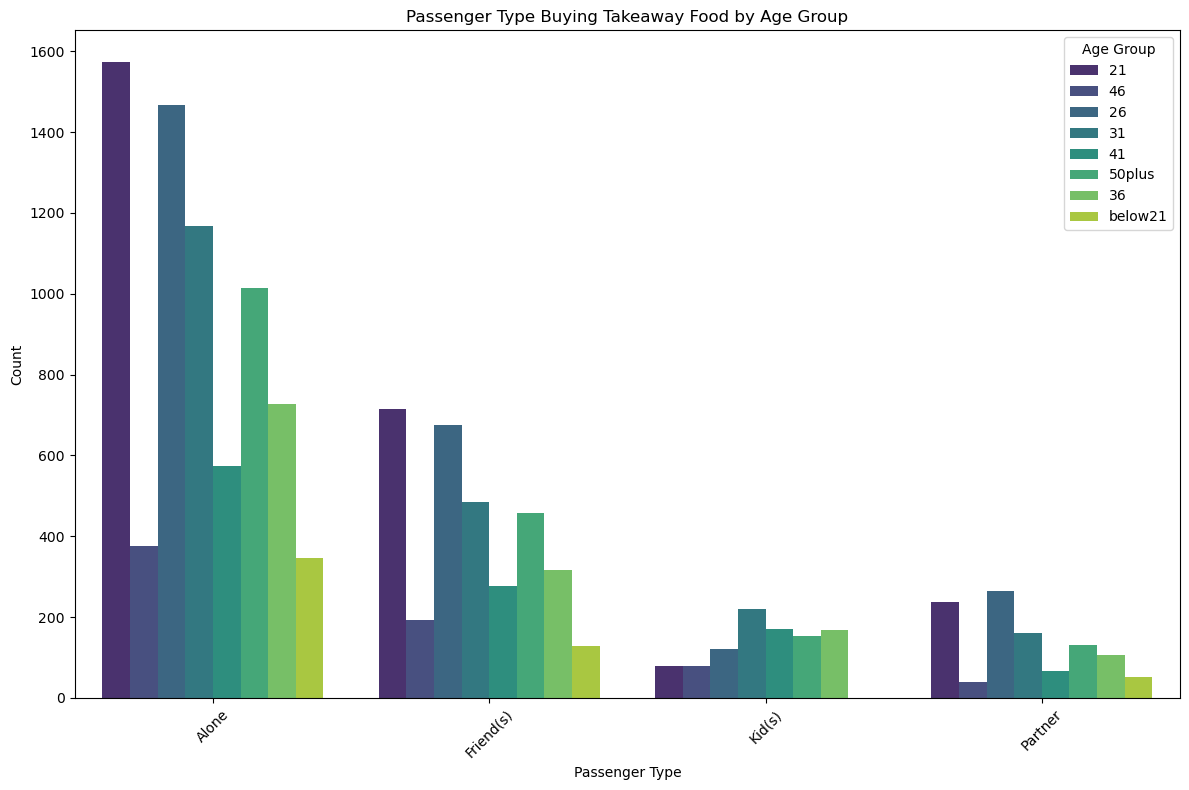

In [172]:
# plot a bar graph for passengers buying CarryAway food considering the age
df = pd.read_csv('data/coupons.csv')

# Filter data where CarryAway is not null (to focus on those who buy takeaway food)
filtered_df = df[df['CarryAway'].notnull()]

# Create a grouped bar plot
plt.figure(figsize=(12, 8))
sns.countplot(x='passanger', hue='age', data=filtered_df, palette='viridis')
plt.title('Passenger Type Buying Takeaway Food by Age Group')
plt.xlabel('Passenger Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()